<a href="https://colab.research.google.com/github/Goswami040/Goswami040/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_table('/content/P339 (2).txt')


In [ ]:
data

,Y,X1,X2,X3
0,0,-62.8,-89.5,1.7
1,0,3.3,-3.5,1.1
2,0,-120.8,-103.2,2.5
3,0,-18.1,-28.8,1.1
4,0,-3.8,-50.6,0.9
...,...,...,...,...
61,1,53.1,7.1,1.9
62,1,39.8,13.8,1.2
63,1,59.5,7.0,2.0
64,1,16.3,20.4,1.0


**Seperate predictor and target variable**

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

**Standarize the dataset**

In [ ]:
X_mean=X.mean()
X_std=X.std()
X_normal=(X-X_mean)/X_std

In [ ]:
X_normal

,Y,X1,X2
0,-0.992395,-0.690959,-1.855309
1,-0.992395,0.237914,0.107878
2,-0.992395,-1.506005,-2.168049
3,-0.992395,-0.062811,-0.469664
4,-0.992395,0.138141,-0.967309
...,...,...,...
61,0.992395,0.937730,0.349853
62,0.992395,0.750831,0.502799
63,0.992395,1.027666,0.347570
64,0.992395,0.420596,0.653462


**Calculate covariance matrix**

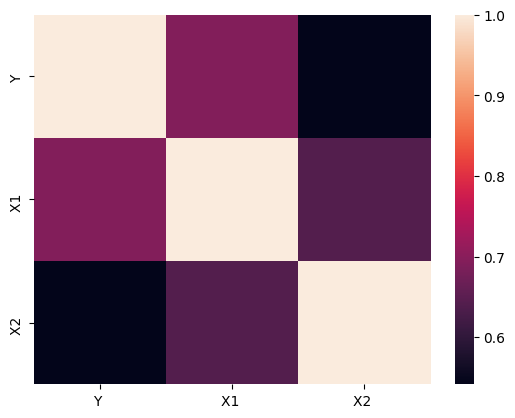

In [ ]:
Z=X_normal.cov()
sns.heatmap(Z)
plt.show()

In [ ]:
Z

,Y,X1,X2
Y,1.000000,0.692177,0.541574
X1,0.692177,1.000000,0.640876
X2,0.541574,0.640876,1.000000


**Calculate eigen values and eigen vectors of the covariance matrix**

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(Z)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [2.25178719 0.46301412 0.28519869]
Eigen values Shape: (3,)
Eigen Vector Shape: (3, 3)


In [ ]:
eigenvectors

array([[-0.57331249, -0.6202565 ,  0.53534537],
       [-0.60171923, -0.12473099, -0.7889082 ],
       [-0.55609959,  0.77441853,  0.30171043]])

**Sort the eigenvalues in descending order**

In [ ]:
idx = eigenvalues.argsort()[::-1]


In [ ]:
idx

array([0, 1, 2])

In [ ]:
eigenvalues = eigenvalues[idx]


In [ ]:
eigenvalues

array([2.25178719, 0.46301412, 0.28519869])

In [ ]:
eigenvectors = eigenvectors[:,idx]

In [ ]:

eigenvectors

array([[-0.57331249, -0.6202565 ,  0.53534537],
       [-0.60171923, -0.12473099, -0.7889082 ],
       [-0.55609959,  0.77441853,  0.30171043]])

**Variation preserved by the principal components**

In [ ]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)


array([0.75059573, 0.90493377, 1.        ])

In [ ]:
explained_var

array([0.75059573, 0.90493377, 1.        ])

**Principal Components of the feature set**

In [ ]:
pcs=eigenvectors[:,:2]
pca_component=pd.DataFrame(pcs,columns=['PC1','PC2'])

In [ ]:
pcs=eigenvectors[:,:2]
pca_component=pd.DataFrame(pcs,columns=['PC1','PC2'])

In [ ]:
pca_component

,PC1,PC2
0,-0.573312,-0.620256
1,-0.601719,-0.124731
2,-0.556100,0.774419


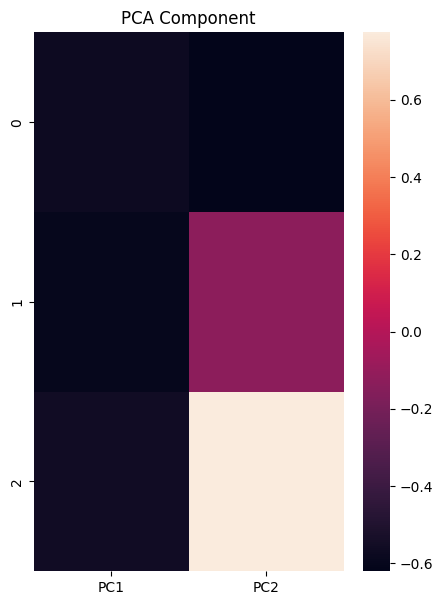

In [ ]:
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [ ]:
pca_component.shape

(3, 2)

In [ ]:
X_normal.shape

(66, 3)

In [ ]:
X_normal_pca=np.dot(X_normal,pca_component)

In [ ]:
X_normal_pca

array([[ 2.01645233, -0.73506213],
       [ 0.36580429,  0.66940754],
       [ 2.68079638, -0.87559246],
       [ 0.86792686,  0.25965763],
       [ 1.02375098, -0.15079288],
       [ 1.58019609, -0.14918113],
       [ 0.74181195,  0.46504572],
       [ 2.32142477,  0.62188378],
       [ 0.22798555,  0.62459119],
       [ 1.53712884,  0.51820441],
       [ 1.1356249 ,  0.1750121 ],
       [ 1.96154666,  0.71179285],
       [ 3.79653459,  0.1152728 ],
       [ 0.57529227,  0.32491725],
       [ 1.78373605,  0.33982427],
       [ 5.47565018, -3.88699928],
       [ 0.88811715,  0.45475407],
       [ 0.50521522,  0.89734123],
       [ 0.67051821,  0.9417619 ],
       [ 0.98364211,  0.51923688],
       [ 0.97751473,  0.12192759],
       [ 0.58483931,  0.65388243],
       [ 1.44197938,  0.54113116],
       [ 1.62032161,  0.71214392],
       [ 0.58367319,  0.4647605 ],
       [ 0.88365232,  0.11059463],
       [ 1.01234304,  0.614549  ],
       [ 0.68346997,  0.44889001],
       [ 0.65028175,

**Create new dataframe**

In [ ]:
X_transformed=pd.DataFrame(X_normal_pca,columns=['PC1','PC2'])

In [ ]:
X_transformed.head()

,PC1,PC2
0,2.016452,-0.735062
1,0.365804,0.669408
2,2.680796,-0.875592
3,0.867927,0.259658
4,1.023751,-0.150793


**Plot the points**

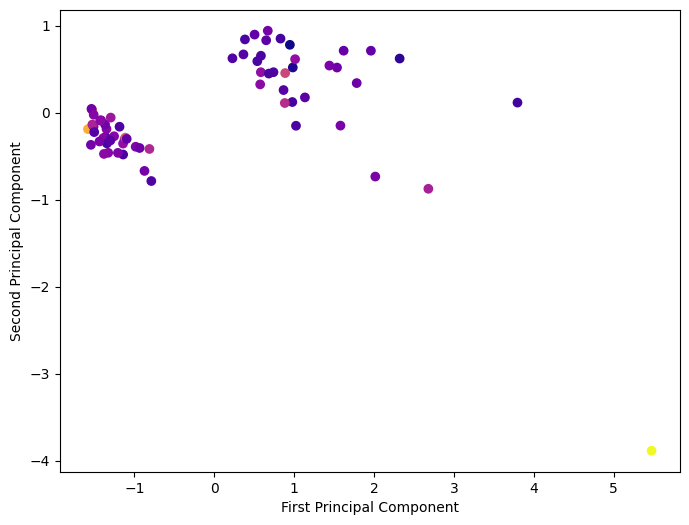

In [ ]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(X_transformed.iloc[:, 0], X_transformed.iloc[:, 1],
            c=y,
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('2D plot.jpeg')
plt.show()

In [ ]:
data1=pd.read_table('/content/P320-1.txt')

In [ ]:
data1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.87
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.5,50.7,14.4,8,10,39,57,997.88
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.35
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.29
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.29
5,53,45,80,7.7,3.45,10.2,66.8,3325,38.5,43.1,25.5,30,32,72,54,1030.38
6,43,30,74,10.9,3.23,12.1,83.9,4679,3.5,49.2,11.3,21,32,62,56,934.70
7,45,30,73,9.3,3.29,10.6,86.0,2140,5.3,40.4,10.5,6,4,4,56,899.53
8,36,24,70,9.0,3.31,10.5,83.2,6582,8.1,42.5,12.6,18,12,37,61,1001.90
9,36,27,72,9.5,3.36,10.7,79.3,4213,6.7,41.0,13.2,12,7,20,59,912.35


**Seperate predictor and target variable**

In [ ]:
X=data1.iloc[:,1:]
Y=data1.iloc[:,0]

In [ ]:
X_mean=X.mean()
X_std=X.std()
X_normal=(X-X_mean)/X_std

In [ ]:

X_normal

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,-0.686734,-0.752299,-0.476824,0.568074,0.504752,0.114107,-0.435354,-0.344126,-0.754744,-0.642613,-0.183197,-0.165108,0.082557,0.248296,-0.297211
1,-1.080091,-0.542355,1.571584,-0.910644,0.031547,-0.411045,0.278488,-0.938220,1.001147,0.006410,-0.324535,-0.273022,-0.232948,-0.124148,0.924684
2,-0.490056,-0.122467,1.093622,-0.393092,-1.388068,0.133557,0.264046,-1.240872,-1.448429,-0.474348,-0.346280,-0.359353,-0.327599,-0.682814,0.353523
3,1.083369,0.927252,-1.569308,1.085625,0.149848,-0.663895,-0.516504,1.707179,0.892758,1.496760,-0.215813,-0.316187,-0.469576,-0.310370,0.674067
4,0.099978,0.507364,-0.818225,1.307433,-1.624671,0.717059,1.763940,1.404528,-0.516290,-0.017628,0.055992,0.331295,2.401518,-0.496592,2.104782
5,1.083369,1.137196,-0.749945,1.381369,-0.914863,-2.745051,-0.378962,2.985042,-0.646356,2.674618,-0.085347,0.201799,0.287635,-0.682814,1.447135
6,-0.391717,-0.122467,1.435024,-0.245221,1.332861,0.580908,0.552196,-0.938220,0.675982,-0.738765,-0.183197,0.201799,0.129883,-0.310370,-0.090963
7,-0.391717,-0.332411,0.342539,0.198395,-0.441658,0.989360,-1.193898,-0.736452,-1.231653,-0.931068,-0.346280,-0.402518,-0.785081,-0.310370,-0.656336
8,-0.981752,-0.962243,0.137699,0.346266,-0.559959,0.444758,1.860908,-0.422591,-0.776422,-0.426272,-0.215813,-0.229856,-0.264498,0.620740,0.989307
9,-0.686734,-0.542355,0.479100,0.715946,-0.323357,-0.313794,0.231724,-0.579522,-1.101587,-0.282045,-0.281046,-0.337770,-0.532677,0.248296,-0.450249


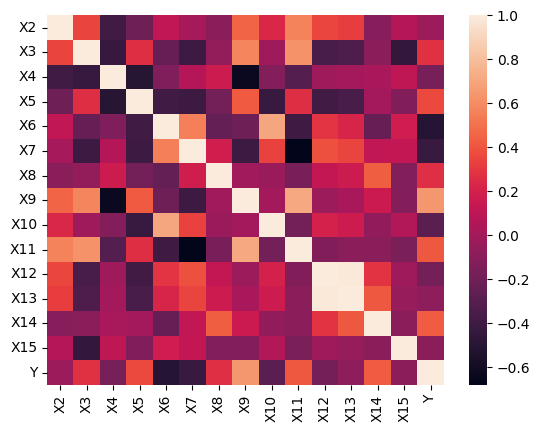

In [ ]:
Z=X_normal.cov()
sns.heatmap(Z)
plt.show()

In [ ]:
Z

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
X2,1.000000,0.346282,-0.398099,-0.209212,0.116284,0.014852,-0.100051,0.453774,0.237992,0.565314,0.350809,0.321014,-0.107810,0.067872,-0.030022
X3,0.346282,1.000000,-0.434040,0.262280,-0.238544,-0.415032,-0.060994,0.575309,-0.021412,0.619308,-0.356494,-0.337668,-0.099348,-0.452809,0.277018
X4,-0.398099,-0.434040,1.000000,-0.509087,-0.138862,0.065010,0.161991,-0.637821,-0.117715,-0.309771,-0.020486,-0.002082,0.017248,0.112426,-0.174593
X5,-0.209212,0.262280,-0.509087,1.000000,-0.395075,-0.410590,-0.184332,0.419410,-0.425723,0.259904,-0.388205,-0.358429,-0.004084,-0.135740,0.357307
X6,0.116284,-0.238544,-0.138862,-0.395075,1.000000,0.552237,-0.243883,-0.208774,0.703196,-0.403338,0.286835,0.224402,-0.234346,0.176491,-0.510988
X7,0.014852,-0.415032,0.065010,-0.410590,0.552237,1.000000,0.181881,-0.410334,0.338745,-0.680680,0.386767,0.348250,0.117952,0.121901,-0.426821
X8,-0.100051,-0.060994,0.161991,-0.184332,-0.243883,0.181881,1.000000,-0.005678,-0.031765,-0.162945,0.120282,0.165312,0.432086,-0.124976,0.265503
X9,0.453774,0.575309,-0.637821,0.419410,-0.208774,-0.410334,-0.005678,1.000000,-0.004387,0.704915,-0.025865,0.018385,0.159293,-0.117957,0.643742
X10,0.237992,-0.021412,-0.117715,-0.425723,0.703196,0.338745,-0.031765,-0.004387,1.000000,-0.185161,0.203672,0.160034,-0.068461,0.060713,-0.284805
X11,0.565314,0.619308,-0.309771,0.259904,-0.403338,-0.680680,-0.162945,0.704915,-0.185161,1.000000,-0.129784,-0.102544,-0.096483,-0.152223,0.410490


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(Z)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [4.39311268 2.72986789 2.29247531 1.26824079 1.18765175 1.03142154
 0.66147511 0.42733079 0.32915063 0.0046695  0.06159967 0.09404074
 0.20906571 0.15186989 0.15802802]
Eigen values Shape: (15,)
Eigen Vector Shape: (15, 15)


In [ ]:
eigenvectors

array([[ 0.07316093,  0.47151313,  0.17921815, -0.30025632, -0.0695367 ,
        -0.11620278,  0.37417045,  0.19687675, -0.04128061, -0.0161138 ,
         0.42712997,  0.3322064 ,  0.336098  , -0.17291109,  0.12378392],
       [ 0.34095972,  0.1419937 ,  0.16854711,  0.14032151, -0.41711614,
         0.02658681,  0.09884204,  0.29108877,  0.01136744, -0.01220408,
        -0.05913394,  0.22615237, -0.47625102,  0.17174475, -0.48482954],
       [-0.20726002, -0.31100067, -0.19499895, -0.41711926, -0.30263657,
        -0.12566435, -0.25201419,  0.06709918,  0.16069608, -0.04972143,
         0.27204414,  0.15164133,  0.19898724,  0.53539129, -0.14620744],
       [ 0.31773682, -0.12417989,  0.00634929,  0.29854104,  0.42858545,
         0.29433331,  0.07408531, -0.16320676, -0.21605058, -0.02774872,
         0.08466201,  0.39588416,  0.30813429,  0.40428   , -0.14927867],
       [-0.29993791,  0.18565745,  0.34771671,  0.26126023,  0.05493587,
        -0.07931137, -0.22349588, -0.08755134, 

**Sort the eigenvalues in descending order**

In [ ]:

idx = eigenvalues.argsort()[::-1]
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 12, 14, 13, 11, 10,  9])

In [ ]:
eigenvalues = eigenvalues[idx]
eigenvalues

array([4.39311268, 2.72986789, 2.29247531, 1.26824079, 1.18765175,
       1.03142154, 0.66147511, 0.42733079, 0.32915063, 0.20906571,
       0.15802802, 0.15186989, 0.09404074, 0.06159967, 0.0046695 ])

In [ ]:
eigenvectors = eigenvectors[:,idx]

In [ ]:
eigenvectors

array([[ 0.07316093,  0.47151313,  0.17921815, -0.30025632, -0.0695367 ,
        -0.11620278,  0.37417045,  0.19687675, -0.04128061,  0.336098  ,
         0.12378392, -0.17291109,  0.3322064 ,  0.42712997, -0.0161138 ],
       [ 0.34095972,  0.1419937 ,  0.16854711,  0.14032151, -0.41711614,
         0.02658681,  0.09884204,  0.29108877,  0.01136744, -0.47625102,
        -0.48482954,  0.17174475,  0.22615237, -0.05913394, -0.01220408],
       [-0.20726002, -0.31100067, -0.19499895, -0.41711926, -0.30263657,
        -0.12566435, -0.25201419,  0.06709918,  0.16069608,  0.19898724,
        -0.14620744,  0.53539129,  0.15164133,  0.27204414, -0.04972143],
       [ 0.31773682, -0.12417989,  0.00634929,  0.29854104,  0.42858545,
         0.29433331,  0.07408531, -0.16320676, -0.21605058,  0.30813429,
        -0.14927867,  0.40428   ,  0.39588416,  0.08466201, -0.02774872],
       [-0.29993791,  0.18565745,  0.34771671,  0.26126023,  0.05493587,
        -0.07931137, -0.22349588, -0.08755134, 

**Variation preserved by the principal components**

In [ ]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.29287418, 0.47486537, 0.62769706, 0.71224644, 0.79142323,
       0.86018466, 0.904283  , 0.93277172, 0.9547151 , 0.96865281,
       0.97918801, 0.98931267, 0.99558205, 0.9996887 , 1.        ])

**Principal Components of the feature set
**

In [ ]:
pcs=eigenvectors[:,:2]
pca_component=pd.DataFrame(pcs,columns=['PC1','PC2'])

In [ ]:
pca_component

,PC1,PC2
0,0.073161,0.471513
1,0.340960,0.141994
2,-0.207260,-0.311001
3,0.317737,-0.124180
4,-0.299938,0.185657
5,-0.363456,0.100660
6,-0.040494,0.026879
7,0.348512,0.335575
8,-0.200664,0.255142
9,0.369996,0.221558


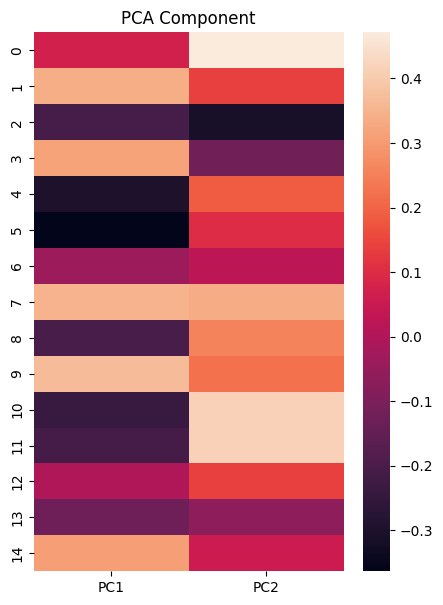

In [ ]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


In [ ]:
pca_component.shape

(15, 2)

In [ ]:

X_normal.shape

(60, 15)

In [ ]:
X_normal_pca=np.dot(X_normal,pca_component)

In [ ]:
X_normal_pca

array([[-0.45314386, -0.87626285],
       [-0.84011535, -1.26844412],
       [-0.03418067, -1.94258847],
       [ 2.61924724,  1.846573  ],
       [ 2.12215204,  1.01647893],
       [ 5.01506594,  1.92317854],
       [-1.80354139, -0.56201706],
       [-0.67349099, -1.58415059],
       [-0.21038711, -1.3358115 ],
       [-0.01923147, -1.63639263],
       [ 4.21269148,  0.5180179 ],
       [-0.31146213,  0.9119833 ],
       [ 0.83507191,  0.07109668],
       [-0.53422702, -0.43504679],
       [-0.00803886,  0.16071204],
       [ 0.75140036,  1.3631804 ],
       [ 0.20597663, -0.48514029],
       [-1.50285727,  0.27421305],
       [ 0.31489556,  0.23024797],
       [ 1.3519842 , -1.52778585],
       [ 1.18894501,  1.08300247],
       [-0.77503523, -1.61186989],
       [ 3.44466242,  0.50550398],
       [-1.79645903, -0.78372198],
       [ 2.28071396,  2.05370906],
       [ 0.16815594, -0.3040074 ],
       [-0.15799451,  0.01830605],
       [-0.00708639, -1.81155435],
       [-5.68740407,


**Create new dataframe**

In [ ]:
X_transformed= pd.DataFrame(X_normal_pca,
                     columns = ['PCA1','PCA2']
                            )

In [ ]:

X_transformed.head()

,PCA1,PCA2
0,-0.453144,-0.876263
1,-0.840115,-1.268444
2,-0.034181,-1.942588
3,2.619247,1.846573
4,2.122152,1.016479


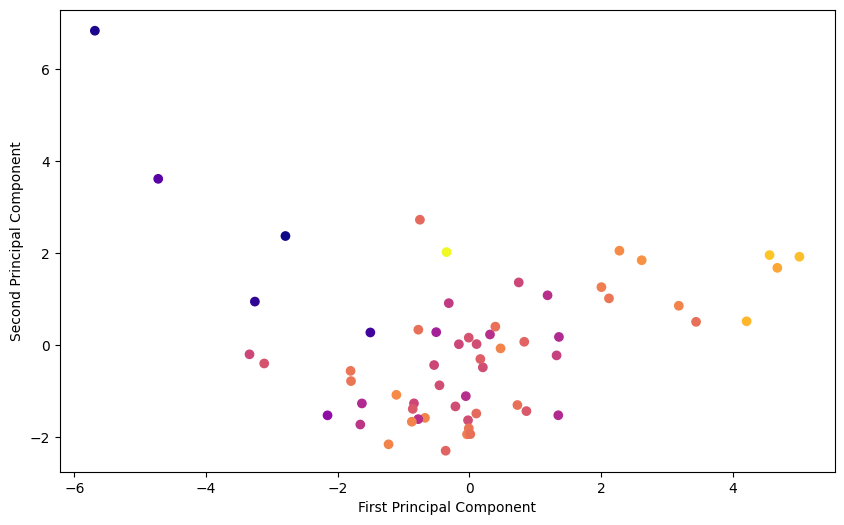

In [ ]:
# giving a larger plot
plt.figure(figsize=(10, 6))

plt.scatter(X_transformed.iloc[:, 0], X_transformed.iloc[:, 1],
            c=Y,
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('2D plot.jpeg')
plt.show()


In [ ]:
data2=pd.read_table('/content/p349-50.txt')

In [ ]:
data2

,Patient,RW,IR,SSPG,CC
0,1,0.81,124,55,3
1,2,0.95,117,76,3
2,3,0.94,143,105,3
3,4,1.04,199,108,3
4,5,1.00,240,143,3
...,...,...,...,...,...
85,86,0.95,748,122,2
86,87,1.06,320,253,2
87,88,0.98,188,211,2
88,89,1.16,607,271,2


In [ ]:
X=data2.iloc[:,1:]
Y=data2.iloc[:,0]

In [ ]:
X_mean=X.mean()
X_std=X.std()
X_normal=(X-X_mean)/X_std

In [ ]:
X_normal

,RW,IR,SSPG,CC
0,-1.122896,-0.646003,-1.112691,0.426806
1,-0.077956,-0.714657,-0.790986,0.426806
2,-0.152594,-0.459656,-0.346727,0.426806
3,0.593791,0.089577,-0.300769,0.426806
4,0.295237,0.491694,0.235406,0.426806
...,...,...,...,...
85,-0.077956,5.474023,-0.086299,-2.316949
86,0.743069,1.276313,1.920528,-2.316949
87,0.145960,-0.018308,1.277118,-2.316949
88,1.489454,4.091132,2.196275,-2.316949


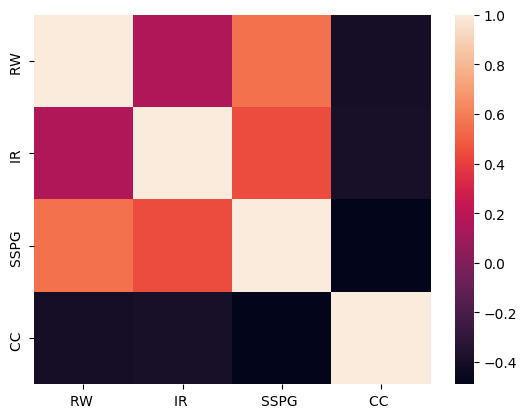

In [ ]:
Z=X_normal.cov()
sns.heatmap(Z)
plt.show()


In [ ]:
Z

,RW,IR,SSPG,CC
RW,1.000000,0.159045,0.555575,-0.405847
IR,0.159045,1.000000,0.445321,-0.395749
SSPG,0.555575,0.445321,1.000000,-0.489339
CC,-0.405847,-0.395749,-0.489339,1.000000


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(Z)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [2.24444097 0.84799933 0.35983383 0.54772587]
Eigen values Shape: (4,)
Eigen Vector Shape: (4, 4)


In [ ]:
eigenvectors

array([[ 0.47677561,  0.64683396, -0.56059065,  0.20007241],
       [ 0.42838304, -0.75224878, -0.39294562,  0.31016687],
       [ 0.56881166,  0.09670666,  0.72771072,  0.37086147],
       [-0.51538945,  0.07984626, -0.04205916,  0.85219089]])

In [ ]:
idx = eigenvalues.argsort()[::-1]
idx

array([0, 1, 3, 2])

In [ ]:
eigenvalues = eigenvalues[idx]
eigenvalues

array([2.24444097, 0.84799933, 0.54772587, 0.35983383])

In [ ]:
eigenvectors = eigenvectors[:,idx]


In [ ]:
eigenvectors

array([[ 0.47677561,  0.64683396,  0.20007241, -0.56059065],
       [ 0.42838304, -0.75224878,  0.31016687, -0.39294562],
       [ 0.56881166,  0.09670666,  0.37086147,  0.72771072],
       [-0.51538945,  0.07984626,  0.85219089, -0.04205916]])

In [ ]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var


array([0.56111024, 0.77311008, 0.91004154, 1.        ])

In [ ]:
pcs=eigenvectors[:,:2]
pca_component=pd.DataFrame(pcs,columns=['PC1','PC2'])

In [ ]:
pca_component

,PC1,PC2
0,0.476776,0.646834
1,0.428383,-0.752249
2,0.568812,0.096707
3,-0.515389,0.079846


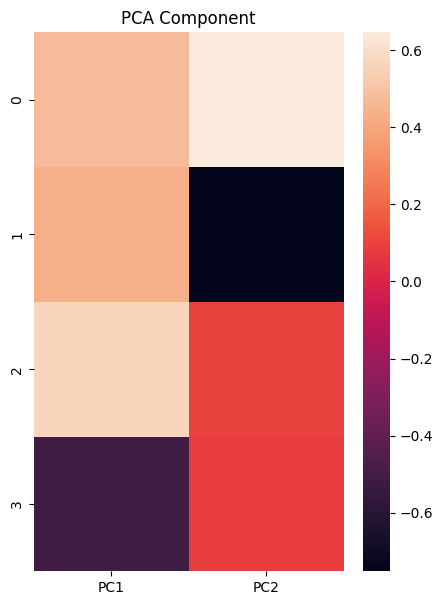

In [ ]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [ ]:
pca_component.shape

(4, 2)

In [ ]:
X_normal.shape

(90, 4)

In [ ]:
X_normal_pca=np.dot(X_normal,pca_component)

In [ ]:

X_normal_pca

array([[-1.66498915e+00, -3.13898270e-01],
       [-1.01320784e+00,  4.44760533e-01],
       [-6.86855678e-01,  2.47620357e-01],
       [-6.95736140e-02,  3.21692596e-01],
       [ 2.65325712e-01, -1.22062862e-01],
       [-7.45753215e-01, -6.35798873e-01],
       [-3.43905807e-01, -4.51948000e-01],
       [ 6.31810942e-02,  7.02832911e-01],
       [-5.74124385e-01,  4.86021728e-01],
       [-1.40249867e+00, -4.52601964e-01],
       [-9.54601755e-01, -5.98004259e-01],
       [-1.62694512e+00, -1.08223638e+00],
       [-3.22684028e-01,  4.50637539e-01],
       [-9.07796124e-01, -6.73482838e-01],
       [-1.44788769e+00, -1.25233032e+00],
       [-3.22767091e-01,  9.97540216e-04],
       [-3.32368657e-01,  9.10717159e-01],
       [-1.42320446e+00, -5.97498953e-01],
       [-1.58386022e+00, -1.50910499e-01],
       [-1.28572928e+00,  2.65417453e-01],
       [-1.18607986e+00,  2.61618444e-01],
       [-1.91564442e+00, -7.33035607e-01],
       [-6.01002742e-01, -2.73336237e-02],
       [-2.

In [ ]:
X_transformed= pd.DataFrame(X_normal_pca,
                     columns = ['PCA1','PCA2']
                            )

In [ ]:

X_transformed.head()

,PCA1,PCA2
0,-1.664989,-0.313898
1,-1.013208,0.444761
2,-0.686856,0.247620
3,-0.069574,0.321693
4,0.265326,-0.122063


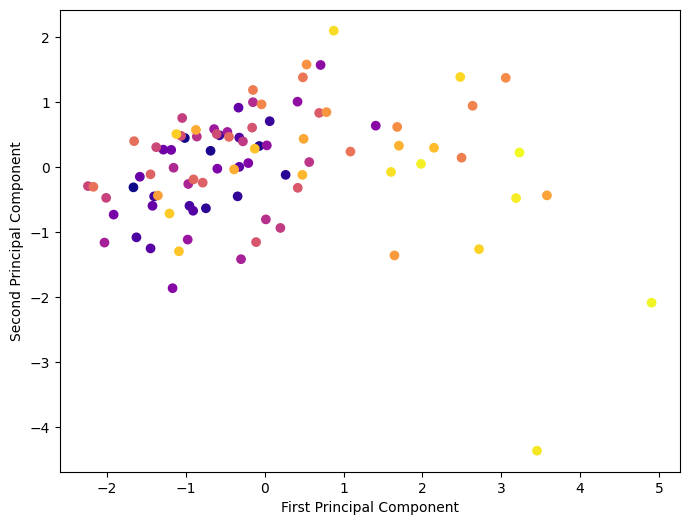

In [ ]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(X_transformed.iloc[:, 0], X_transformed.iloc[:, 1],
            c=Y,
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('3D plot.jpeg')
plt.show()